In [2]:
import time
import h5py
import pickle
import os, sys
import matplotlib
import numpy as np
from astropy import units
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle, ConnectionPatch
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.append('/Users/belugawhale/Documents/GitHub/wasp39b_paper/scripts/')
from utils import pipeline_dictionary, load_plt_params

In [3]:
def load_plt_params():
    """ Load in plt.rcParams and set (based on paper defaults).
    """
    params = Table.read('./scripts/rcParams.txt', format='csv')
    for i, name in enumerate(params['name']):
        try:
            plt.rcParams[name] = float(params['value'][i])
        except:
            plt.rcParams[name] = params['value'][i]
    return params

def load_parula():
    """ Load in custom parula colormap.
    """
    colors = np.load('./data/parula_colors.npy')
    return colors

def pipeline_dictionary():
    """ Loads in the custom colors for the paper figures.
    """
    pipeline_dict = {}
    pipelines = Table.read('./data/pipelines.csv', format='csv')

    # Sets the initials key for each pipeline
    for i, name in enumerate(pipelines['initials']):
        pipeline_dict[name] = {}
        pipeline_dict[name]['color'] = pipelines['color'][i]
        pipeline_dict[name]['name'] = pipelines['name'][i]
        pipeline_dict[name]['filename'] = pipelines['filename'][i]

    return pipeline_dict

load_plt_params()
colors = load_parula()
pipeline_dict = pipeline_dictionary()

In [4]:
plt.rcParams['font.size'] = 14

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_34983/654572441.py:27: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(img), aspect='auto', cmap='Greys',
/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_34983/654572441.py:140: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/traces.jpg',


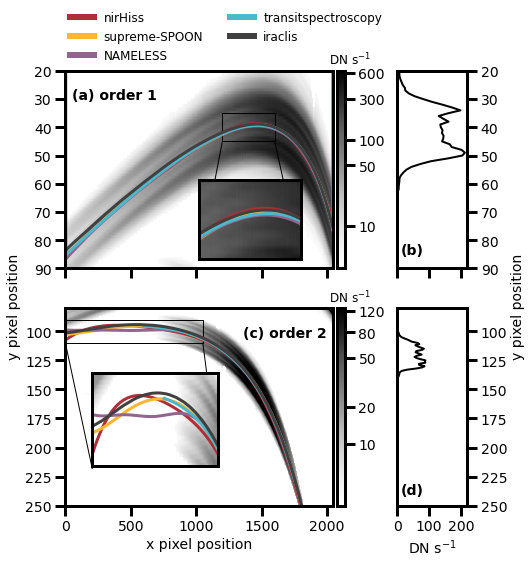

In [29]:
# Create the figure environment
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, 
                                             figsize=(7.20472,8), #sharex=True,
                                             gridspec_kw={'width_ratios':[2,0.5]})

ax3.yaxis.tick_right()
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

fig.set_facecolor('w')

# Load in the median frame to plot as the background
img = np.load('./data/traces/example_integration.npy', allow_pickle=True)

vmin, vmax = 0.5, 2
# Add inset plot axes
axins1 = ax1.inset_axes([0.5, 0.05, 0.38, 0.4])
axins2 = ax2.inset_axes([0.1, 0.2, 0.47, 0.47])

for i, ax in enumerate([ax1, ax2, axins1, axins2]):
    if i == 0 or i == 2:
        factor=1.4
    else:
        factor=1.05

    # Plot the image
    im = ax.imshow(np.log10(img), aspect='auto', cmap='Greys',
                   vmin=vmin, vmax=vmax*factor)

    # Add colorbars for the main figures
    if i < 2:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='3%', pad=0.05)
        cbar = fig.colorbar(im, cax=cax, orientation='vertical')
        if i == 0:
            labels = [10,50,100,300,600]
        else:
            labels = [10,20,50,80,120]

        ticks = np.log10(labels)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels(labels)
        cax.set_title('DN s$^{-1}$', fontsize=12, x=1.6)

labels=['nirHiss', 'supreme-SPOON', 'NAMELESS', 'transitspectroscopy','iraclis']
x = 0
for i,name in enumerate(['CMADF', 'MCR', 'LPC', 'NE', 'AT']):

    tab = Table.read(os.path.join('./data/traces','{}_traces.csv'.format(name)),
                     format='csv')

    tab.sort('x')

    for ax in [ax1, axins1]:
        ax.plot(tab['x'], tab['order1'], lw=3,
                 color=pipeline_dict[name]['color'], label=labels[x])

    for ax in [ax2, axins2]:
        try:
            ax.plot(tab[(tab['order2']<255) & (tab['order2'] > 0)]['x'],
                     tab[(tab['order2']<255) & (tab['order2'] > 0)]['order2'],
                     lw=3, color=pipeline_dict[name]['color'])
        except:
            ax.plot(tab[tab['order2']>0]['x'],
                     tab[tab['order2']>0]['order2'],
                     lw=3, color=pipeline[name]['color'])
    x += 1


# Create legend and increase markersize in the legend
leg = ax1.legend(bbox_to_anchor=(0., 1.02, 1.2, .102), loc=3,
                 ncol=2, mode="expand", borderaxespad=0., fontsize=12,
                 frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0)

# Turn off the axes ticks for the inset plots
for ax in [axins1, axins2]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

## Mark the inset axes for Order 1
x1, x2, y1, y2 = 1200, 1600, 45, 35
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

rect = Rectangle((x1, y2), x2-x1, y1-y2, facecolor='none', edgecolor='k')
ax1.add_patch(rect)

ax1.plot(np.linspace(x1, 1025, 10), np.linspace(y1, 87, 10), lw=1, color='k')
ax1.plot(np.linspace(x2, 1800, 10), np.linspace(y1, 87, 10), lw=1, color='k')

## Mark the inset axes for Order 2
x1, x2, y1, y2 = 0, 1050, 110, 90
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)

rect = Rectangle((x1, y2), x2-x1, y1-y2, facecolor='none', edgecolor='k')
ax2.add_patch(rect)

ax2.plot(np.linspace(x1, 205, 10), np.linspace(110, 218, 10), lw=1, color='k')
ax2.plot(np.linspace(x2-x1, 1173, 10), np.linspace(110, 216, 10), lw=1,
         color='k')

# Add ax3 profile
ax3.plot(img[:,1250], np.arange(0,256,1), color='k', lw=2)
ax3.set_ylim(90,20)

# Add ax4 profile
ax4.plot(img[:,1250], np.arange(0,256,1), color='k', lw=2)
ax4.set_ylim(250,80)

for a in [ax3, ax4]:
    a.set_xlim(0,220)
    a.set_xticks([0, 100, 200])
ax3.set_xticklabels([])
ax4.set_xlabel('DN s$^{-1}$')

# Add text labeling the subplots
ax1.text(s='(a) order 1', x=50, y=30, fontweight='bold')
ax2.text(s='(c) order 2', x=1360, y=105, fontweight='bold')

ax3.text(s='(b)', x=10, y=85, fontweight='bold')
ax4.text(s='(d)', x=10, y=240, fontweight='bold')

# Set the x and y limits for each subplot
ax2.set_ylim(250,80)
ax1.set_ylim(90, 20)
ax1.set_xlim(0,2048)
ax1.set_xticklabels([])

ax2.set_ylabel('y pixel position', y=1.01, fontsize=14)
ax4.set_ylabel('y pixel position', y=1.01, fontsize=14)
ax2.set_xlabel('x pixel position', fontsize=14)

plt.subplots_adjust(wspace=0.3)

plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/traces.jpg',
            rasterize=True, bbox_inches='tight', dpi=250)